# Wrangle & Analyze Data

> ### Wrangle & Analyze the WeRateDogs Twitter Archive
> ### Stephanie Anderton


## Introduction

The "We Rate Dogs" Twitter archive contains over 5000 tweets, which have been filtered to create the enhanced archive that forms the basis of this analysis. The goal of this project is to wrangle the data - gather, assess, and clean - into a tidy dataset, and then provide analyses and visualizations.

In [2]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import datetime
import random

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

# set the option to display the full string from a pandas DataFrame
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

C:\Users\sidhi\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


## Gather Data

### 1. Enhanced Twitter Archive

### twitter-archive-enhanced.csv

> The WeRateDogs Twitter archive is provided as the starting point, and is download manually from the Udacity server: twitter_archive_enhanced.csv

In [3]:
# load the provided enhanced twitter archive file into a DataFrame
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


**Sample Tweet Data**

Here is a sample of one of the tweets, with additional output to display the entire field's data.

In [5]:
sample_tweet = df_twitter_archive.iloc[2]
sample_tweet

tweet_id                      891815181378084864                                                                                                                               
in_reply_to_status_id         NaN                                                                                                                                              
in_reply_to_user_id           NaN                                                                                                                                              
timestamp                     2017-07-31 00:18:03 +0000                                                                                                                        
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                               
text                          This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never 

In [6]:
sample_tweet.text

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'

In [7]:
sample_tweet.expanded_urls

'https://twitter.com/dog_rates/status/891815181378084864/photo/1'

In [8]:
sample_tweet.source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

### 2. Image Predictions File

image_predictions.tsv

This file contains the tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file is also hosted on Udacity's servers and is downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [9]:
# download the image predictions file with the provided link
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [10]:
#  HTTP status code 200 indicates the request has succeeded 
file_images = url.split('/')[-1]

with open(os.path.join('./', file_images), mode = 'wb') as file:
    file.write(response.content)

In [11]:
ls *.tsv

 Volume in drive C is Windows
 Volume Serial Number is FCFC-0871

 Directory of C:\Users\sidhi\Desktop\tweeter_Analysis

15-05-2020  17:44           335,079 image-predictions.tsv
               1 File(s)        335,079 bytes
               0 Dir(s)  315,132,649,472 bytes free


In [12]:
# read image predictions file into a DataFrame
df_predictions = pd.read_csv(file_images, sep = '\\t', engine = 'python')
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
# check one observation
df_predictions.iloc[2]

tweet_id    666033412701032449                             
jpg_url     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
img_num     1                                              
p1          German_shepherd                                
p1_conf     0.596461                                       
p1_dog      True                                           
p2          malinois                                       
p2_conf     0.138584                                       
p2_dog      True                                           
p3          bloodhound                                     
p3_conf     0.116197                                       
p3_dog      True                                           
Name: 2, dtype: object

### 3. Download Tweet JSON Data
>Query the Twitter API using Python's Tweepy library to get the entire set of JSON data for each of the tweets in the WeRateDogs Twitter archive. Each tweet's JSON data is written to its own line in a file called tweet_json.txt file.

In [15]:
CONSUMER_KEY = 'HIDDEN'
CONSUMER_SECRET = 'HIDDEN'
OAUTH_TOKEN = 'HIDDEN'
OAUTH_TOKEN_SECRET = 'HIDDEN'

In [16]:
# Create the Twitter API object and set rate limit params

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

api = tweepy.API(auth_handler = auth, 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

**Download tweets**

In [17]:
# Get a list of tweet_ids from the enhanced twitter archive to use for 
# downloading with the Twitter API

tweet_ids = df_twitter_archive.tweet_id.values
print("# of tweet_ids: " + str(len(tweet_ids)) + "\n")

count = 0
tweet_json_list = []
fails_dict = {}

start_time = time.time()

for tweet_id in tweet_ids:
    count += 1
    try:
        # attempt to get the tweet's JSON data and append to the tweet JSON list
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_json_list.append(tweet._json)
    except tweepy.TweepError as err:
        # save the error to the fail dictionary for review
        print("TweepError for id:  " + str(tweet_id))
        fails_dict[tweet_id] = err
        pass
    # To save space, only print out loop/tweet id for every 100th tweet
    if count % 100 == 0:
        print("loop # " + str(count))

elapsed_time = time.time() - start_time

elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print("\nTime elapsed (HH:MM:SS):  " + elapsed_time_str + "\n")

# display list of tweets with errors
print("Number of TweepErrors:  {}\n".format(len(fails_dict)))
for tweet_id in fails_dict:
    print(tweet_id, fails_dict[tweet_id])

# of tweet_ids: 2356

TweepError for id:  892420643555336193
TweepError for id:  892177421306343426
TweepError for id:  891815181378084864
TweepError for id:  891689557279858688
TweepError for id:  891327558926688256
TweepError for id:  891087950875897856
TweepError for id:  890971913173991426
TweepError for id:  890729181411237888
TweepError for id:  890609185150312448
TweepError for id:  890240255349198849
TweepError for id:  890006608113172480
TweepError for id:  889880896479866881
TweepError for id:  889665388333682689
TweepError for id:  889638837579907072
TweepError for id:  889531135344209921
TweepError for id:  889278841981685760
TweepError for id:  888917238123831296
TweepError for id:  888804989199671297
TweepError for id:  888554962724278272
TweepError for id:  888202515573088257
TweepError for id:  888078434458587136
TweepError for id:  887705289381826560
TweepError for id:  887517139158093824
TweepError for id:  887473957103951883
TweepError for id:  887343217045368832
Twe

TweepError for id:  852226086759018497
TweepError for id:  852189679701164033
TweepError for id:  851953902622658560
TweepError for id:  851861385021730816
TweepError for id:  851591660324737024
TweepError for id:  851464819735769094
TweepError for id:  851224888060895234
TweepError for id:  850753642995093505
TweepError for id:  850380195714523136
TweepError for id:  850333567704068097
TweepError for id:  850145622816686080
TweepError for id:  850019790995546112
TweepError for id:  849776966551130114
TweepError for id:  849668094696017920
TweepError for id:  849412302885593088
TweepError for id:  849336543269576704
TweepError for id:  849051919805034497
TweepError for id:  848690551926992896
TweepError for id:  848324959059550208
TweepError for id:  848213670039564288
TweepError for id:  848212111729840128
TweepError for id:  847978865427394560
TweepError for id:  847971574464610304
TweepError for id:  847962785489326080
TweepError for id:  847842811428974592
TweepError for id:  84761

TweepError for id:  822244816520155136
TweepError for id:  822163064745328640
TweepError for id:  821886076407029760
TweepError for id:  821813639212650496
TweepError for id:  821765923262631936
TweepError for id:  821522889702862852
TweepError for id:  821421320206483457
TweepError for id:  821407182352777218
TweepError for id:  821153421864615936
TweepError for id:  821149554670182400
TweepError for id:  821107785811234820
TweepError for id:  821044531881721856
TweepError for id:  820837357901512704
TweepError for id:  820749716845686786
TweepError for id:  820690176645140481
TweepError for id:  820494788566847489
TweepError for id:  820446719150292993
TweepError for id:  820314633777061888
TweepError for id:  820078625395449857
TweepError for id:  820013781606658049
TweepError for id:  819952236453363712
TweepError for id:  819924195358416896
TweepError for id:  819711362133872643
TweepError for id:  819588359383371776
TweepError for id:  819347104292290561
TweepError for id:  81923

TweepError for id:  794355576146903043
TweepError for id:  794332329137291264
TweepError for id:  794205286408003585
TweepError for id:  793962221541933056
TweepError for id:  793845145112371200
TweepError for id:  793614319594401792
TweepError for id:  793601777308463104
TweepError for id:  793500921481273345
TweepError for id:  793286476301799424
TweepError for id:  793271401113350145
TweepError for id:  793256262322548741
TweepError for id:  793241302385262592
TweepError for id:  793226087023144960
TweepError for id:  793210959003287553
TweepError for id:  793195938047070209
TweepError for id:  793180763617361921
TweepError for id:  793165685325201412
TweepError for id:  793150605191548928
TweepError for id:  793135492858580992
TweepError for id:  793120401413079041
TweepError for id:  792913359805018113
TweepError for id:  792883833364439040
TweepError for id:  792773781206999040
TweepError for id:  792394556390137856
TweepError for id:  792050063153438720
TweepError for id:  79182

TweepError for id:  767191397493538821
TweepError for id:  767122157629476866
TweepError for id:  766864461642756096
TweepError for id:  766793450729734144
TweepError for id:  766714921925144576
TweepError for id:  766693177336135680
TweepError for id:  766423258543644672
TweepError for id:  766313316352462849
TweepError for id:  766078092750233600
TweepError for id:  766069199026450432
TweepError for id:  766008592277377025
TweepError for id:  765719909049503744
TweepError for id:  765669560888528897
TweepError for id:  765395769549590528
TweepError for id:  765371061932261376
TweepError for id:  765222098633691136
TweepError for id:  764857477905154048
TweepError for id:  764259802650378240
TweepError for id:  763956972077010945
TweepError for id:  763837565564780549
TweepError for id:  763183847194451968
TweepError for id:  763167063695355904
TweepError for id:  763103485927849985
TweepError for id:  762699858130116608
TweepError for id:  762471784394268675
TweepError for id:  76246

TweepError for id:  743222593470234624
TweepError for id:  743210557239623680
TweepError for id:  742534281772302336
TweepError for id:  742528092657332225
TweepError for id:  742465774154047488
TweepError for id:  742423170473463808
TweepError for id:  742385895052087300
TweepError for id:  742161199639494656
TweepError for id:  742150209887731712
TweepError for id:  741793263812808706
TweepError for id:  741743634094141440
TweepError for id:  741438259667034112
TweepError for id:  741303864243200000
TweepError for id:  741099773336379392
TweepError for id:  741067306818797568
TweepError for id:  740995100998766593
TweepError for id:  740711788199743490
TweepError for id:  740699697422163968
TweepError for id:  740676976021798912
TweepError for id:  740373189193256964
TweepError for id:  740365076218183684
TweepError for id:  740359016048689152
TweepError for id:  740214038584557568
TweepError for id:  739979191639244800
TweepError for id:  739932936087216128
TweepError for id:  73984

TweepError for id:  710272297844797440
TweepError for id:  710269109699739648
TweepError for id:  710153181850935296
TweepError for id:  710140971284037632
TweepError for id:  710117014656950272
TweepError for id:  709918798883774466
TweepError for id:  709901256215666688
TweepError for id:  709852847387627521
TweepError for id:  709566166965075968
TweepError for id:  709556954897764353
TweepError for id:  709519240576036864
TweepError for id:  709449600415961088
TweepError for id:  709409458133323776
TweepError for id:  709225125749587968
TweepError for id:  709207347839836162
TweepError for id:  709198395643068416
TweepError for id:  709179584944730112
TweepError for id:  709158332880297985
TweepError for id:  709042156699303936
TweepError for id:  708853462201716736
TweepError for id:  708845821941387268
TweepError for id:  708834316713893888
TweepError for id:  708810915978854401
TweepError for id:  708738143638450176
TweepError for id:  708711088997666817
TweepError for id:  70847

TweepError for id:  694183373896572928
TweepError for id:  694001791655137281
TweepError for id:  693993230313091072
TweepError for id:  693942351086120961
TweepError for id:  693647888581312512
TweepError for id:  693644216740769793
TweepError for id:  693642232151285760
TweepError for id:  693629975228977152
TweepError for id:  693622659251335168
TweepError for id:  693590843962331137
TweepError for id:  693582294167244802
TweepError for id:  693486665285931008
TweepError for id:  693280720173801472
TweepError for id:  693267061318012928
TweepError for id:  693262851218264065
TweepError for id:  693231807727280129
TweepError for id:  693155686491000832
TweepError for id:  693109034023534592
TweepError for id:  693095443459342336
TweepError for id:  692919143163629568
TweepError for id:  692905862751522816
TweepError for id:  692901601640583168
TweepError for id:  692894228850999298
TweepError for id:  692828166163931137
TweepError for id:  692752401762250755
TweepError for id:  69256

TweepError for id:  682032003584274432
TweepError for id:  682003177596559360
TweepError for id:  681981167097122816
TweepError for id:  681891461017812993
TweepError for id:  681694085539872773
TweepError for id:  681679526984871937
TweepError for id:  681654059175129088
TweepError for id:  681610798867845120
TweepError for id:  681579835668455424
TweepError for id:  681523177663676416
TweepError for id:  681340665377193984
TweepError for id:  681339448655802368
TweepError for id:  681320187870711809
TweepError for id:  681302363064414209
TweepError for id:  681297372102656000
TweepError for id:  681281657291280384
TweepError for id:  681261549936340994
TweepError for id:  681242418453299201
TweepError for id:  681231109724700672
TweepError for id:  681193455364796417
TweepError for id:  680970795137544192
loop # 1700
TweepError for id:  680959110691590145
TweepError for id:  680940246314430465
TweepError for id:  680934982542561280
TweepError for id:  680913438424612864
TweepError fo

TweepError for id:  674774481756377088
TweepError for id:  674767892831932416
TweepError for id:  674764817387900928
TweepError for id:  674754018082705410
TweepError for id:  674752233200820224
TweepError for id:  674743008475090944
TweepError for id:  674742531037511680
TweepError for id:  674739953134403584
TweepError for id:  674737130913071104
TweepError for id:  674690135443775488
TweepError for id:  674670581682434048
loop # 1900
TweepError for id:  674664755118911488
TweepError for id:  674646392044941312
TweepError for id:  674644256330530816
TweepError for id:  674638615994089473
TweepError for id:  674632714662858753
TweepError for id:  674606911342424069
TweepError for id:  674468880899788800
TweepError for id:  674447403907457024
TweepError for id:  674436901579923456
TweepError for id:  674422304705744896
TweepError for id:  674416750885273600
TweepError for id:  674410619106390016
TweepError for id:  674394782723014656
TweepError for id:  674372068062928900
TweepError fo

TweepError for id:  670717338665226240
loop # 2100
TweepError for id:  670704688707301377
TweepError for id:  670691627984359425
TweepError for id:  670679630144274432
TweepError for id:  670676092097810432
TweepError for id:  670668383499735048
TweepError for id:  670474236058800128
TweepError for id:  670468609693655041
TweepError for id:  670465786746662913
TweepError for id:  670452855871037440
TweepError for id:  670449342516494336
TweepError for id:  670444955656130560
TweepError for id:  670442337873600512
TweepError for id:  670435821946826752
TweepError for id:  670434127938719744
TweepError for id:  670433248821026816
TweepError for id:  670428280563085312
TweepError for id:  670427002554466305
TweepError for id:  670421925039075328
TweepError for id:  670420569653809152
TweepError for id:  670417414769758208
TweepError for id:  670411370698022913
TweepError for id:  670408998013820928
TweepError for id:  670403879788544000
TweepError for id:  670385711116361728
TweepError fo

TweepError for id:  666804364988780544
TweepError for id:  666786068205871104
TweepError for id:  666781792255496192
TweepError for id:  666776908487630848
TweepError for id:  666739327293083650
TweepError for id:  666701168228331520
TweepError for id:  666691418707132416
TweepError for id:  666649482315059201
TweepError for id:  666644823164719104
TweepError for id:  666454714377183233
TweepError for id:  666447344410484738
TweepError for id:  666437273139982337
TweepError for id:  666435652385423360
TweepError for id:  666430724426358785
TweepError for id:  666428276349472768
TweepError for id:  666421158376562688
TweepError for id:  666418789513326592
TweepError for id:  666411507551481857
TweepError for id:  666407126856765440
TweepError for id:  666396247373291520
TweepError for id:  666373753744588802
TweepError for id:  666362758909284353
TweepError for id:  666353288456101888
TweepError for id:  666345417576210432
TweepError for id:  666337882303524864
TweepError for id:  66629

792883833364439040 [{'code': 89, 'message': 'Invalid or expired token.'}]
792773781206999040 [{'code': 89, 'message': 'Invalid or expired token.'}]
792394556390137856 [{'code': 89, 'message': 'Invalid or expired token.'}]
792050063153438720 [{'code': 89, 'message': 'Invalid or expired token.'}]
791821351946420224 [{'code': 89, 'message': 'Invalid or expired token.'}]
791784077045166082 [{'code': 89, 'message': 'Invalid or expired token.'}]
791780927877898241 [{'code': 89, 'message': 'Invalid or expired token.'}]
791774931465953280 [{'code': 89, 'message': 'Invalid or expired token.'}]
791672322847637504 [{'code': 89, 'message': 'Invalid or expired token.'}]
791406955684368384 [{'code': 89, 'message': 'Invalid or expired token.'}]
791312159183634433 [{'code': 89, 'message': 'Invalid or expired token.'}]
791026214425268224 [{'code': 89, 'message': 'Invalid or expired token.'}]
790987426131050500 [{'code': 89, 'message': 'Invalid or expired token.'}]
790946055508652032 [{'code': 89, 'mess

727644517743104000 [{'code': 89, 'message': 'Invalid or expired token.'}]
727524757080539137 [{'code': 89, 'message': 'Invalid or expired token.'}]
727314416056803329 [{'code': 89, 'message': 'Invalid or expired token.'}]
727286334147182592 [{'code': 89, 'message': 'Invalid or expired token.'}]
727175381690781696 [{'code': 89, 'message': 'Invalid or expired token.'}]
727155742655025152 [{'code': 89, 'message': 'Invalid or expired token.'}]
726935089318363137 [{'code': 89, 'message': 'Invalid or expired token.'}]
726887082820554753 [{'code': 89, 'message': 'Invalid or expired token.'}]
726828223124897792 [{'code': 89, 'message': 'Invalid or expired token.'}]
726224900189511680 [{'code': 89, 'message': 'Invalid or expired token.'}]
725842289046749185 [{'code': 89, 'message': 'Invalid or expired token.'}]
725786712245440512 [{'code': 89, 'message': 'Invalid or expired token.'}]
725729321944506368 [{'code': 89, 'message': 'Invalid or expired token.'}]
725458796924002305 [{'code': 89, 'mess

707693576495472641 [{'code': 89, 'message': 'Invalid or expired token.'}]
707629649552134146 [{'code': 89, 'message': 'Invalid or expired token.'}]
707610948723478529 [{'code': 89, 'message': 'Invalid or expired token.'}]
707420581654872064 [{'code': 89, 'message': 'Invalid or expired token.'}]
707411934438625280 [{'code': 89, 'message': 'Invalid or expired token.'}]
707387676719185920 [{'code': 89, 'message': 'Invalid or expired token.'}]
707377100785885184 [{'code': 89, 'message': 'Invalid or expired token.'}]
707315916783140866 [{'code': 89, 'message': 'Invalid or expired token.'}]
707297311098011648 [{'code': 89, 'message': 'Invalid or expired token.'}]
707059547140169728 [{'code': 89, 'message': 'Invalid or expired token.'}]
707038192327901184 [{'code': 89, 'message': 'Invalid or expired token.'}]
707021089608753152 [{'code': 89, 'message': 'Invalid or expired token.'}]
707014260413456384 [{'code': 89, 'message': 'Invalid or expired token.'}]
706904523814649856 [{'code': 89, 'mess

691793053716221953 [{'code': 89, 'message': 'Invalid or expired token.'}]
691756958957883396 [{'code': 89, 'message': 'Invalid or expired token.'}]
691675652215414786 [{'code': 89, 'message': 'Invalid or expired token.'}]
691483041324204033 [{'code': 89, 'message': 'Invalid or expired token.'}]
691459709405118465 [{'code': 89, 'message': 'Invalid or expired token.'}]
691444869282295808 [{'code': 89, 'message': 'Invalid or expired token.'}]
691416866452082688 [{'code': 89, 'message': 'Invalid or expired token.'}]
691321916024623104 [{'code': 89, 'message': 'Invalid or expired token.'}]
691096613310316544 [{'code': 89, 'message': 'Invalid or expired token.'}]
691090071332753408 [{'code': 89, 'message': 'Invalid or expired token.'}]
690989312272396288 [{'code': 89, 'message': 'Invalid or expired token.'}]
690959652130045952 [{'code': 89, 'message': 'Invalid or expired token.'}]
690938899477221376 [{'code': 89, 'message': 'Invalid or expired token.'}]
690932576555528194 [{'code': 89, 'mess

678389028614488064 [{'code': 89, 'message': 'Invalid or expired token.'}]
678380236862578688 [{'code': 89, 'message': 'Invalid or expired token.'}]
678341075375947776 [{'code': 89, 'message': 'Invalid or expired token.'}]
678334497360859136 [{'code': 89, 'message': 'Invalid or expired token.'}]
678278586130948096 [{'code': 89, 'message': 'Invalid or expired token.'}]
678255464182861824 [{'code': 89, 'message': 'Invalid or expired token.'}]
678023323247357953 [{'code': 89, 'message': 'Invalid or expired token.'}]
678021115718029313 [{'code': 89, 'message': 'Invalid or expired token.'}]
677961670166224897 [{'code': 89, 'message': 'Invalid or expired token.'}]
677918531514703872 [{'code': 89, 'message': 'Invalid or expired token.'}]
677895101218201600 [{'code': 89, 'message': 'Invalid or expired token.'}]
677716515794329600 [{'code': 89, 'message': 'Invalid or expired token.'}]
677700003327029250 [{'code': 89, 'message': 'Invalid or expired token.'}]
677698403548192770 [{'code': 89, 'mess

671550332464455680 [{'code': 89, 'message': 'Invalid or expired token.'}]
671547767500775424 [{'code': 89, 'message': 'Invalid or expired token.'}]
671544874165002241 [{'code': 89, 'message': 'Invalid or expired token.'}]
671542985629241344 [{'code': 89, 'message': 'Invalid or expired token.'}]
671538301157904385 [{'code': 89, 'message': 'Invalid or expired token.'}]
671536543010570240 [{'code': 89, 'message': 'Invalid or expired token.'}]
671533943490011136 [{'code': 89, 'message': 'Invalid or expired token.'}]
671528761649688577 [{'code': 89, 'message': 'Invalid or expired token.'}]
671520732782923777 [{'code': 89, 'message': 'Invalid or expired token.'}]
671518598289059840 [{'code': 89, 'message': 'Invalid or expired token.'}]
671511350426865664 [{'code': 89, 'message': 'Invalid or expired token.'}]
671504605491109889 [{'code': 89, 'message': 'Invalid or expired token.'}]
671497587707535361 [{'code': 89, 'message': 'Invalid or expired token.'}]
671488513339211776 [{'code': 89, 'mess

666094000022159362 [{'code': 89, 'message': 'Invalid or expired token.'}]
666082916733198337 [{'code': 89, 'message': 'Invalid or expired token.'}]
666073100786774016 [{'code': 89, 'message': 'Invalid or expired token.'}]
666071193221509120 [{'code': 89, 'message': 'Invalid or expired token.'}]
666063827256086533 [{'code': 89, 'message': 'Invalid or expired token.'}]
666058600524156928 [{'code': 89, 'message': 'Invalid or expired token.'}]
666057090499244032 [{'code': 89, 'message': 'Invalid or expired token.'}]
666055525042405380 [{'code': 89, 'message': 'Invalid or expired token.'}]
666051853826850816 [{'code': 89, 'message': 'Invalid or expired token.'}]
666050758794694657 [{'code': 89, 'message': 'Invalid or expired token.'}]
666049248165822465 [{'code': 89, 'message': 'Invalid or expired token.'}]
666044226329800704 [{'code': 89, 'message': 'Invalid or expired token.'}]
666033412701032449 [{'code': 89, 'message': 'Invalid or expired token.'}]
666029285002620928 [{'code': 89, 'mess

In [18]:
tweet_json_file = 'tweet_json.txt'

In [19]:
# save the JSON data in the list to the output file
with open(tweet_json_file, 'w') as outfile:
    for tweet_json in tweet_json_list:
        json.dump(tweet_json, outfile)
        outfile.write('\n')

In [20]:
ls tweet_json.txt

 Volume in drive C is Windows
 Volume Serial Number is FCFC-0871

 Directory of C:\Users\sidhi\Desktop\tweeter_Analysis

15-05-2020  18:30                 0 tweet_json.txt
               1 File(s)              0 bytes
               0 Dir(s)  315,140,149,248 bytes free


**Read in JSON data to DataFrame**

Extract the required fields from each tweet's JSON data and store in a separate file, tweet_data_extra.csv, for use during the assessment phase.

In [71]:
# read in the JSON data from the text file, and save to a DataFrame
tweet_json_data = []

with open(tweet_json_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
df_tweet_data_extra = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

df_tweet_data_extra.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8330,38089
1,892177421306343426,6154,32679
2,891815181378084864,4073,24595
3,891689557279858688,8474,41449
4,891327558926688256,9167,39623


In [72]:
df_tweet_data_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2340 non-null   int64
 1   retweet_count   2340 non-null   int64
 2   favorite_count  2340 non-null   int64
dtypes: int64(3)
memory usage: 55.0 KB


In [73]:
df_tweet_data_extra.to_csv('tweet_data_extra.csv', index = False)

### Assess Data

In this section I assess the data that was gathered, both visually and programmatically for quality and tidiness issues. One of the key points for the analysis requires that only tweets with original ratings with images, no retweets, be retained.

The quality of data is assessed against dimensions or criteria concerning the content: completeness, validity, accuracy and consistency.

Tidiness of data is assessed with regard to structure according to the rules defined by Hadley Wikham.

In [74]:
# Load the data gathered data files
archive = pd.read_csv('twitter-archive-enhanced.csv')
predictions = pd.read_csv('image-predictions.tsv', sep = '\\t', engine = 'python')
json_data = pd.read_csv('tweet_data_extra.csv')

In [75]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**NOTES:**

The info() method reveals several quality and tidiness issues:

- There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
- There are 78 replies (in_reply_to_status_id, in_reply_to_user_id)
- There are 2297 tweets with expanded_urls (links to images) indicating 59 tweets with missing data
- The timestamp field is in string format (object)
- There are 4 columns for dog stages (doggo, floofer, pupper, puppo)
- The columns related to retweets are not applicable for original tweets
- The columns related to replies are not applicable for original tweets

In [76]:
print("Data type for timestamp:  " + str(type(archive.timestamp[0])))

Data type for timestamp:  <class 'str'>


In [77]:
print("Duplicated:  {}".format(sum(archive.duplicated())))

Duplicated:  0


In [78]:
archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [79]:
archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twi

**NOTES:**

The head() and tail() methods show us several issues:

> Quality:

>The timestamp column has dates in string form.
Some of the rows from the tail() output above have invalid strings in the name column, e.g. "a", "an", "in". These words are all the 3rd word in the tweet.
Values of "None" in the name column.
Tidiness:

>The columns with numerical data that are typically used for analysis are located to the far right of the table, and the columns with long strings are on the left; this makes it difficult to readily see the data that will be used for analyses.

In [80]:
archive.name.value_counts().head(50)

None       745
a          55 
Charlie    12 
Cooper     11 
Oliver     11 
Lucy       11 
Penny      10 
Lola       10 
Tucker     10 
Bo         9  
Winston    9  
the        8  
Sadie      8  
Toby       7  
Buddy      7  
an         7  
Bailey     7  
Daisy      7  
Koda       6  
Stanley    6  
Rusty      6  
Bella      6  
Dave       6  
Oscar      6  
Scout      6  
Jax        6  
Leo        6  
Jack       6  
Milo       6  
Oakley     5  
Gus        5  
Phil       5  
Finn       5  
Louis      5  
Larry      5  
George     5  
Bentley    5  
very       5  
Sunny      5  
Alfie      5  
Sammy      5  
Chester    5  
Riley      4  
Beau       4  
Gerald     4  
Ruby       4  
Loki       4  
Bruce      4  
Jeffrey    4  
Winnie     4  
Name: name, dtype: int64

it looks like the dog names are all capitalized, so words that begin in lowercase are probably not names, like "a", "the" and "an". Here's the list of these "names".

In [81]:
# list all names that are NOT capitalized
err_names_mask = archive.name.str.contains('^[a-z]', regex = True)
archive[err_names_mask].name.value_counts().sort_index()

a               55
actually        2 
all             1 
an              7 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            4 
life            1 
light           1 
mad             2 
my              1 
not             2 
officially      1 
old             1 
one             4 
quite           4 
space           1 
such            1 
the             8 
this            1 
unacceptable    1 
very            5 
Name: name, dtype: int64

In [82]:
len(archive[err_names_mask])

109

In [83]:
# number of tweets with missing urls
sum(archive.expanded_urls.isna())

59

In [84]:
# how many tweets with missing urls are replies or retweets?
sum(archive.expanded_urls.isna() & \
    (archive.in_reply_to_status_id.notnull() | \
     archive.retweeted_status_id.notnull()))

56

In [85]:
# display tweets that are missing urls, and are NOT replies and are NOT retweets
mask = archive.expanded_urls.isna() & \
       archive.in_reply_to_status_id.isna() & \
       archive.retweeted_status_id.isna()
archive[mask][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 would listen,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


> Of the 59 tweets that are missing data in expanded_urls, 56 are replies or retweets. The remaining 3 tweets (at indexes 375, 707 and 1445) with NaN in the expanded_urls column all have valid ratings but no urls within the text column.

>The question now is whether these tweets are part of the predictions or json_data tables.

In [86]:
# are any of these tweets in the predictions table?
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = predictions.tweet_id.isin(tweet_set)
sum(find_tweet_id)

0

In [87]:
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = json_data.tweet_id.isin(tweet_set)
json_data[find_tweet_id]

,tweet_id,retweet_count,favorite_count
366,828361771580813312,184,2323
695,785515384317313025,1376,6527
1430,696518437233913856,1814,4086


It turns out that these 3 tweets are NOT in the predictions table, and even though they ARE in the json_data table, there was NO image url extracted from the JSON data.



In [88]:
archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


For rating_numerator and rating_denominator, the describe() method shows us some quality issues:

- The max values are huge: 1776, 170.
- The minimum is 0 for both.

In [89]:
archive.rating_denominator.value_counts().sort_index(ascending = False)

170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
80     2   
70     1   
50     3   
40     1   
20     2   
16     1   
15     1   
11     3   
10     2333
7      1   
2      1   
0      1   
Name: rating_denominator, dtype: int64

In [90]:
sum(archive.rating_denominator != 10)

23

It's interesting that many of the larger numbers are multiples of 10. When looking at some of those tweets we see that there is more than 1 dog in the photo. Ignoring the retweets and replies we have the following list.

In [91]:
# display tweets that do NOT have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (archive.rating_denominator != 10) & \
            archive.in_reply_to_status_id.isna() & \
            archive.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,810984652412424192,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",709198395643068416,45,50


In [92]:
sum(mask_find)

17

> Ignoring the replies and retweets, there are 17 tweets with denominators that aren't 10.

Many of these which are multiples of 10 are about multiple dogs, and the text indicates this, like "floofs", "puppers", "squad" and "pups". I'll just drop the tweets for multiples, but I'll reset the rating for single dogs.

In [93]:
# I'm CURIOUS! Just had to see what this one was about! 
# ...it's a video, and there's lots of dogs/pups!
archive.iloc[902].expanded_urls

'https://twitter.com/dog_rates/status/758467244762497024/video/1'

In [94]:
archive.rating_numerator.value_counts().sort_index(ascending = False)

1776    1  
960     1  
666     1  
420     2  
204     1  
182     1  
165     1  
144     1  
143     1  
121     1  
99      1  
88      1  
84      1  
80      1  
75      2  
60      1  
50      1  
45      1  
44      1  
27      1  
26      1  
24      1  
20      1  
17      1  
15      2  
14      54 
13      351
12      558
11      464
10      461
9       158
8       102
7       55 
6       32 
5       37 
4       17 
3       19 
2       9  
1       9  
0       2  
Name: rating_numerator, dtype: int64

In [95]:
sum(archive.rating_numerator >= 15)

28

The output above shows ALL the rating_numerator values, showing a count of 28 tweets with numerator >= 15. Next, looking at ONLY those ratings with denominators = 10, the results are as follows:

In [96]:
df_tweets_denom_10 = archive[archive.rating_denominator == 10]
df_tweets_denom_10.rating_numerator.value_counts().sort_index(ascending = False)

1776    1  
666     1  
420     2  
182     1  
75      2  
27      1  
26      1  
17      1  
15      2  
14      54 
13      351
12      558
11      463
10      461
9       156
8       102
7       54 
6       32 
5       37 
4       15 
3       19 
2       9  
1       8  
0       2  
Name: rating_numerator, dtype: int64

In [97]:
sum(df_tweets_denom_10.rating_numerator >= 15)

12

Looking ONLY at tweets that have denominators = 10, there are 12 with numerators >= 15. I chose 15 as the lower boundary because it's got just 2 counts, while 14 has a count of 54. We can check the texts to see if the numerator makes sense.

NOTE: The next queries ignore retweets and replies.

In [98]:
# display tweets with numerator >= 15 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (archive.rating_denominator == 10) & \
            (archive.rating_numerator >= 15) & \
            archive.in_reply_to_status_id.isna() & \
            archive.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",786709082849828864,75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,778027034220126208,27,10
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,749981277374128128,1776,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,680494726643068929,26,10
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,670842764863651840,420,10


Here we have 5 tweets (excluding retweets and replies) with denominator = 10 and numerator >= 15. Looking at the text column we see ratings with decimals or huge numbers.

Since there are so few, and I don't want to impose a rating myself, I'll ignore these tweets and drop them.

In [99]:
# display tweets with numerator = 0 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (archive.rating_denominator == 10) & \
            (archive.rating_numerator == 0) & \
            archive.in_reply_to_status_id.isna() & \
            archive.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,835152434251116546,0,10


In [100]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

> There are only 4 types of sources, and they can be simplified by using the display string portion just before the final "<\a>":

- Twitter for iPhone
- Vine - Make a Scene
- Twitter Web Client
- TweetDeck

In [101]:
archive.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [102]:
archive.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [103]:
archive.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [104]:
archive.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [105]:
archive[archive.floofer == 'floofer'].text

46      Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP 
200     At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
582     This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5                                         
774     Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744                                    
984     This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB                         
1022    Here's a golden floofer helping with the groceries. Bed got in way. Still 11/10 helpful af (vid by @categoen) https://t.co/6ZRo

Using the floofer category as an example, it looks like there are a few ways that this type is spelled: "floofer", "floofiest", and "Floofer".
The other dog stage types may be similar in the variety of spelling.

In [106]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [107]:
predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [108]:
predictions.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [109]:
predictions.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [110]:
predictions.p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

In [111]:
# check out 20 of the entries that don't predict dogs
predictions[~predictions.p1_dog & \
               ~predictions.p2_dog & \
               ~predictions.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head(20)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False
29,666411507551481857,coho,False,barracouta,False,gar,False
45,666786068205871104,snail,False,slug,False,acorn,False
50,666837028449972224,triceratops,False,armadillo,False,common_iguana,False
51,666983947667116034,swab,False,chain_saw,False,wig,False
53,667012601033924608,hyena,False,African_hunting_dog,False,coyote,False


In [112]:
sum(~predictions.p1_dog & \
    ~predictions.p2_dog & \
    ~predictions.p3_dog)

324

> In each of the prediction columns there are over 500 instances where the algorithm did not predict a dog breed from the image. When combined, there are 324 cases where there is NO valid dog breed from any of the three predictions.

> The best prediction for dog breed could be combined with the twitter archive table; this is essentially another variable pertaining to the dog on which the archive is based.

In [113]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2340 non-null   int64
 1   retweet_count   2340 non-null   int64
 2   favorite_count  2340 non-null   int64
dtypes: int64(3)
memory usage: 55.0 KB


In [114]:
json_data.head(20)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8330,38089
1,892177421306343426,6154,32679
2,891815181378084864,4073,24595
3,891689557279858688,8474,41449
4,891327558926688256,9167,39623
5,891087950875897856,3052,19898
6,890971913173991426,2024,11624
7,890729181411237888,18488,64265
8,890609185150312448,4190,27333
9,890240255349198849,7229,31363


In [115]:
json_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.340000e+03,2340.000000,2340.000000
mean,7.422176e+17,2934.637607,7976.021795
std,6.832564e+16,4943.049421,12350.111679
min,6.660209e+17,0.000000,0.000000
25%,6.783394e+17,590.000000,1377.500000
50%,7.186224e+17,1371.000000,3470.500000
75%,7.986954e+17,3420.750000,9766.250000
max,8.924206e+17,83795.000000,164524.000000


## Assessment Summary
### Quality

**There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).**
- There are 78 reply tweets (in_reply_to_status_id, in_reply_to_user_id).
- There are 2297 tweets with expanded_urls (links to the tweet), indicating 59 tweets with missing data.

> - 56 of these tweets are replies or retweets.
> - The remaining 3 tweets have not got the url within the text column. They are NOT in the predictions table, but even though they ARE in the json_data, there was NO image url in the JSON data.

- The timestamp column is in string format.

- There are 109 tweets with regular words in the name column that are NOT a valid name; these words are always the 3rd word in the tweet and are all lowercase; all valid names start with an uppercase letter.

- There are 775 tweets with the dog name as "None". (Probably not worth looking at as there are too many to verify.) [This issue will not be cleaned]

- Ignoring replies and retweets, there are 17 tweets with rating_denominator NOT equal to 10.



4 tweets have the correct rating within the text, and can be manually fixed:
- 740373189193256964: replace 9/11 with 14/10
- 716439118184652801: replace 50/50 with 11/10
- 682962037429899265: replace 7/11 with 10/10
- 666287406224695296: replace 1/2 with 9/10
- 13 are about multiple dogs/pups, and can be dropped.

- There are 28 tweets with rating_numerator >= 15. The max value is 1776, which does not make sense. When we only look at tweets with rating_denominator of 10, there are 12 tweets with rating_numerator >= 15. Going further, by ignoring the 7 retweets and replies (these are not “original” tweets as specified in the Key Points) we end up with 5 tweets with a rating_numerator >= 15.

- There are only 4 types of values in the source column, and they can be simplified by using the display string portion just before the final "<\a>":

- Twitter for iPhone
- Vine - Make a Scene
- Twitter Web Client
- TweetDeck

**predictions**
- There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".

**json_data**
- Several tweets (16 during this run) from the original archive table have been deleted since the archive was created (TweepErrors were reported).

**Tidiness**

**archive**
- There are 4 columns for dog stages (doggo, floofer, pupper, puppo). The 4 columns for one variable doesn't conform to the rules of "tidy data".

- The Key Points indicates that we’re only interested in “original tweets”, no “retweets”; this data is stored in the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

-  Reply tweets are also not “original tweets” either; this data is stored in the columns in_reply_to_status_id, in_reply_to_user_id.

- When all rating_denominators are the same (10) this column is no longer needed.

- Columns with numerical data are located to the far right of the table, which makes it difficult to readily see the data that will be used for analyses.

**predictions**
- The table does not follow the rules of “Tidy Data”; the columns p1, p2 and p3 contain the same type of data, predictions. The columns p1_conf, p2_conf and p3_conf all contain values for confidence level, and columns p1_dog, p2_dog and p3_dog all contain Boolean values indicating whether the prediction is in fact a type of dog. [This issue will not be cleaned]

- The column jpg_url contains a link to an image file (JPG), but it’s not the same link as the expanded_urls field in the archive dataset. It is actually the same link as the media_url_https field in the tweet’s JSON data. [This issue will not be cleaned]

- The dog breed prediction with the highest confidence level can be combined with the archive table as the twitter table contains information that is all about the dog in the tweet.

**json_data**

- The json_data table should be combined with the archive table.

## Clean Data

In [116]:
# create copies of the dataframes for cleaning
archive_clean = archive.copy()
predictions_clean = predictions.copy()
json_data_clean = json_data.copy()

In [117]:
len_archive = archive_clean.shape[0]; len_archive

2356

**Quality archive #1.**

There are 181 retweets, and we’re only interested in “original tweets”.

**Define**
>Drop all rows containing retweets, where these columns will be non-null: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

**Code**

In [118]:
print("# of retweets:  {}".format(sum(archive_clean.retweeted_status_id.notnull())))

# of retweets:  181


In [119]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]

**Test**

In [120]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [121]:
# confirm the rows are dropped; compare with original table length
print("# of rows dropped:  {}".format(len_archive - archive_clean.shape[0]))
# reset the variable for length of the archive
len_archive = archive_clean.shape[0]

# of rows dropped:  181


**Quality archive #2.**

There are 78 reply tweets; we’re only interested in “original tweets”.

**Define**
> Drop all rows that are replies, those that have non-null values in these columns: in_reply_to_status_id and in_reply_to_user_id.

**Code**

In [122]:
print("# of replies:  {}".format(sum(archive_clean.in_reply_to_status_id.notnull())))

# of replies:  78


In [123]:
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isna()]

**Test**

In [124]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [125]:
# confirm the rows are dropped; compare with previous table length
print("# of rows dropped:  {}".format(len_archive - archive_clean.shape[0]))
# reset the variable for length of the archive
len_archive = archive_clean.shape[0]

# of rows dropped:  78


**Tidiness archive #2.**

All columns related to “retweets” will be empty (we're not interested in retweets).

**Define**
>Since we don't want retweets, we can drop all columns related to retweets: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

**Code**

In [126]:
archive_clean = archive_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

**Test**

In [127]:
# Confirm all retweet related columns are gone
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**Tidiness archive #3.**

All columns related to “replies” will be empty (we're not interested in replies).

**Define**
>Drop all columns related to replies: in_reply_to_status_id and in_reply_to_user_id.

**Code**

In [128]:
archive_clean = archive_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

**Test**

In [129]:
# Confirm all reply related columns are gone
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**Quality archive #4.**

The timestamp column is in string format, it's the wrong data type.

**Define**
>Convert timestamp to datetime data type.

**Code**

In [130]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)
archive_clean['timestamp'] = archive_clean.timestamp.dt.floor('s')

**Test**

In [131]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

**Quality archive #9.**

The source column can be simplified by extracting and replacing with it's display string.

**Define**
>Replace the source string with the display portion of itself. Extract the string between <a href=""> and </a>.

**Code**

In [132]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [133]:
archive_clean['source'] = archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

**Test**

In [134]:
archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

**Quality archive #7 - Part 1.**

Some tweets have wrong values extracted for rating; text contains the tweeter's rating.

**Define**
Manual fix:

- 740373189193256964: replace 9/11 with 14/10
- 716439118184652801: replace 50/50 with 11/10
- 682962037429899265: replace 7/11 with 10/10
- 666287406224695296: replace 1/2 with 9/10

**Code**

In [135]:
mask_row = archive_clean.tweet_id == 740373189193256964
archive_clean.loc[mask_row, 'rating_numerator'] = 14
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [136]:
mask_row = archive_clean.tweet_id == 716439118184652801
archive_clean.loc[mask_row, 'rating_numerator'] = 11
archive_clean.loc[mask_row, 'rating_denominator'] = 10


In [137]:
mask_row = archive_clean.tweet_id == 682962037429899265
archive_clean.loc[mask_row, 'rating_numerator'] = 10
archive_clean.loc[mask_row, 'rating_denominator'] = 10


In [138]:
mask_row = archive_clean.tweet_id == 666287406224695296
archive_clean.loc[mask_row, 'rating_numerator'] = 9
archive_clean.loc[mask_row, 'rating_denominator'] = 10

**Test**

In [139]:
mask_cols = ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']
archive_clean[(archive_clean.tweet_id == 740373189193256964) | \
              (archive_clean.tweet_id == 716439118184652801) | \
              (archive_clean.tweet_id == 682962037429899265) | \
              (archive_clean.tweet_id == 666287406224695296) ][mask_cols]

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10,10
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9,10


**Quality archive #7 - Part 2.**

Some tweets with rating_denominator NOT equal to 10; multiple dogs or no valid rating.

**Define**
>Drop the remaining tweets with rating_denominator values that are NOT equal to 10.

**Code**

In [140]:
# display denominators
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

170    1   
150    1   
120    1   
110    1   
90     1   
80     2   
70     1   
50     2   
40     1   
20     1   
10     2084
7      1   
Name: rating_denominator, dtype: int64

In [141]:
archive_clean = archive_clean[archive_clean.rating_denominator == 10]

**Test**

In [142]:
# check the values in the column - should only be "10"
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    2084
Name: rating_denominator, dtype: int64

**Quality archive #8.**

There are 5 tweets with rating_numerator >= 15, which either don't make sense or are huge.

**Define**
> Drop tweets that have rating_numerator >= 15.

**Code**

In [143]:
# display numerators greater than 15
mask = archive_clean.rating_numerator >= 15
archive_clean[mask].rating_numerator.value_counts().sort_index(ascending = False)

1776    1
420     1
75      1
27      1
26      1
Name: rating_numerator, dtype: int64

In [144]:
archive_clean = archive_clean[archive_clean.rating_numerator < 15]

**Test**

In [145]:
# display ALL numerators
archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

14    39 
13    287
12    486
11    414
10    437
9     153
8     98 
7     51 
6     32 
5     34 
4     15 
3     19 
2     9  
1     4  
0     1  
Name: rating_numerator, dtype: int64

**Quality archive #3.**

Tweets with missing data in expanded_urls (links to the tweet).

**Define**
>Drop tweets with missing data in the expanded_urls.

**Code**

In [146]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2079 non-null   int64              
 1   timestamp           2079 non-null   datetime64[ns, UTC]
 2   source              2079 non-null   object             
 3   text                2079 non-null   object             
 4   expanded_urls       2076 non-null   object             
 5   rating_numerator    2079 non-null   int64              
 6   rating_denominator  2079 non-null   int64              
 7   name                2079 non-null   object             
 8   doggo               2079 non-null   object             
 9   floofer             2079 non-null   object             
 10  pupper              2079 non-null   object             
 11  puppo               2079 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [147]:
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

**Test**

In [148]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2076 non-null   int64              
 1   timestamp           2076 non-null   datetime64[ns, UTC]
 2   source              2076 non-null   object             
 3   text                2076 non-null   object             
 4   expanded_urls       2076 non-null   object             
 5   rating_numerator    2076 non-null   int64              
 6   rating_denominator  2076 non-null   int64              
 7   name                2076 non-null   object             
 8   doggo               2076 non-null   object             
 9   floofer             2076 non-null   object             
 10  pupper              2076 non-null   object             
 11  puppo               2076 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

**Tidiness archive #1.**

There are 4 columns for dog stages: doggo, floofer, pupper, puppo.

**Define**

Melt the 4 columns with the dog stages:

- Create a temporary column called none to store the None values; use lowercase 'n' to avoid confusion with 'None' special NA value.
- Create a new column stage to store the categories: doggo, floofer, pupper, puppo, as well as None, and select the stage from the column that contains a value.
- Cast the stage column to categorical data type.
- Drop the 4 original dog stage columns, and the temporary none column.

**Code**

In [149]:
archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2076,2076,2076,2076
unique,2,2,2,2
top,None,None,None,None
freq,1993,2066,1848,2052


From the describe() output here, I'm going to order the dog stages by count, in increasing order: floofer, puppo, doggo and pupper.

In [150]:
# replace the stage name with 1, and 'None' with 0, like a dummy variable
make_dummy = lambda x: 0 if x == 'None' else 1

archive_clean.doggo = archive_clean.doggo.apply(make_dummy)
archive_clean.floofer = archive_clean.floofer.apply(make_dummy)
archive_clean.pupper = archive_clean.pupper.apply(make_dummy)
archive_clean.puppo = archive_clean.puppo.apply(make_dummy)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
archive_clean['none'] = archive_clean['doggo'] + archive_clean['floofer'] + \
                        archive_clean['pupper'] + archive_clean['puppo']

# have a look at what we have before we continue...
archive_clean['none'].value_counts()

0    1742
1    323 
2    11  
Name: none, dtype: int64

> Here we have a little surprise! Turns out there are 11 tweets that have 2 dog stages set, so these must be tweets about multiple dogs. As there are only 11 entries, I'll just carry on with selecting the first of the dog stages in increasing count order - floofer, puppo, doggo and pupper - so we don't loose too much information.

In [151]:
# if there are NO stages specified then set 'None' to 1
stage_none = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
archive_clean['none'] = archive_clean['none'].apply(stage_none)

# Order the stages in increasing count order: floofer, puppo, doggo and pupper
# set the choice order for dog stage based on count order
stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (archive_clean[stage[0]] == 1),
    (archive_clean[stage[1]] == 1),
    (archive_clean[stage[2]] == 1),
    (archive_clean[stage[3]] == 1),
    (archive_clean[stage[4]] == 1)]

# select the dog stage based on the first successful condition; stage[4] is 'None'
archive_clean['stage'] = np.select(conditions, stage, default = stage[4])

# now we can drop the original 4 dog stage columns, AND the temporary 'None'
archive_clean.drop(stage, axis = 1, inplace = True)

# set the 'stage' column data type to category
archive_clean['stage'] = archive_clean.stage.astype('category')

# Source for algorithm:    https://code.i-harness.com/en/q/19c9fbc

**Test**

In [152]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2076 non-null   int64              
 1   timestamp           2076 non-null   datetime64[ns, UTC]
 2   source              2076 non-null   object             
 3   text                2076 non-null   object             
 4   expanded_urls       2076 non-null   object             
 5   rating_numerator    2076 non-null   int64              
 6   rating_denominator  2076 non-null   int64              
 7   name                2076 non-null   object             
 8   stage               2076 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 148.2+ KB


In [153]:
archive_clean.stage.value_counts()


none       1742
pupper     219 
doggo      81  
puppo      24  
floofer    10  
Name: stage, dtype: int64

**Tidiness json_data #1. & Quality json_data #1.**

The json_data table should be part of the archive table.

There is also missing data for these fields which is handled in the Additional Cleaning part just below.

**Define**
> Merge the retweet_count and favorite_count columns to the archive table, joining on tweet_id.

**Code**

In [154]:
json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2340 non-null   int64
 1   retweet_count   2340 non-null   int64
 2   favorite_count  2340 non-null   int64
dtypes: int64(3)
memory usage: 55.0 KB


In [155]:
archive_clean = pd.merge(archive_clean, json_data_clean, 
                         on = 'tweet_id', how = 'left')

**Test**

In [156]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2075
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2076 non-null   int64              
 1   timestamp           2076 non-null   datetime64[ns, UTC]
 2   source              2076 non-null   object             
 3   text                2076 non-null   object             
 4   expanded_urls       2076 non-null   object             
 5   rating_numerator    2076 non-null   int64              
 6   rating_denominator  2076 non-null   int64              
 7   name                2076 non-null   object             
 8   stage               2076 non-null   category           
 9   retweet_count       2074 non-null   float64            
 10  favorite_count      2074 non-null   float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(3), object(4)
memory usage: 180.6+ KB

**Additional Cleaning**
>The merge of the json_data table with the archive table caused the data types for retweet_count and favorite_count to change from int64 to float64. There is also missing data for these fields.

**Define**
- Drop tweets with missing json_data.
- Change the data type for the retweet_count and favorite_count to be int. ##### Code

In [157]:
mask_cols = ['tweet_id', 'retweet_count', 'favorite_count']
archive_clean[archive_clean.retweet_count.isna() | archive_clean.favorite_count.isna()][mask_cols]

,tweet_id,retweet_count,favorite_count
720,754011816964026368,NaN,NaN
1470,680055455951884288,NaN,NaN


In [158]:
archive_clean = archive_clean[~(archive_clean.retweet_count.isna() | archive_clean.favorite_count.isna())]

# recast the count columns to int type
archive_clean.retweet_count = archive_clean.retweet_count.astype(int)
archive_clean.favorite_count = archive_clean.favorite_count.astype(int)

**Test**

In [159]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2075
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2074 non-null   int64              
 1   timestamp           2074 non-null   datetime64[ns, UTC]
 2   source              2074 non-null   object             
 3   text                2074 non-null   object             
 4   expanded_urls       2074 non-null   object             
 5   rating_numerator    2074 non-null   int64              
 6   rating_denominator  2074 non-null   int64              
 7   name                2074 non-null   object             
 8   stage               2074 non-null   category           
 9   retweet_count       2074 non-null   int32              
 10  favorite_count      2074 non-null   int32              
dtypes: category(1), datetime64[ns, UTC](1), int32(2), int64(3), object(4)
memory usage: 164.3+ KB


**Quality archive #5.**

There are many tweets with regular words in the name column that are NOT a valid name.

**Define**
>Replace all lowercase words in the name column with the string "none".

**Code**

In [160]:
names_mask = archive_clean.name.str.contains('^[a-z]', regex = True)
archive_clean[names_mask].name.value_counts().sort_index()

a               54
actually        2 
all             1 
an              6 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            3 
life            1 
light           1 
mad             1 
my              1 
not             2 
officially      1 
old             1 
one             4 
quite           3 
space           1 
such            1 
the             8 
unacceptable    1 
very            4 
Name: name, dtype: int64

In [161]:
archive_clean.loc[names_mask, 'name'] = "none"

**Test**

In [162]:
# All these entries were changed to "none"
archive_clean[names_mask].name.value_counts().sort_index()

none    102
Name: name, dtype: int64

**Tidiness predictions #3.**

The best dog breed prediction and associated confidence level can be combined with the archive table; these pieces of information provide additional data about the dog in the tweet based on the tweet's image.

NOTE: We only want to keep tweets that have images.

NOTE: This also solves Quality predictions #1 issue, that there are fewer image predictions than tweets in the archive.

**Define**

This is a 2-step process, first creating the columns in the predictions table, then merging to archive.

>Part 1:
>Create two new columns in predictions called breed and confidence: check each dog breed prediction flag in order (p1_dog, p2_dog, p3_dog), and copy the breed with the highest confidence level into the breed column.
Copy the associated confidence level into the new confidence column.
For cases where all 3 prediction flags are False (NOT a valid dog breed), set breed as 'none' and confidence to 0.

>Part 2:
>Merge the new breed and confidence columns into the tweet archive table, using an 'inner' join so that we are left with only tweets with images.
Now we can fix the confidence column; round the values up to a whole number in percentage format.

**Code - Part 1**

In [163]:
# Source:    https://code.i-harness.com/en/q/19c9fbc

# setup the conditions for selection
conditions = [(predictions_clean['p1_dog'] == True),
              (predictions_clean['p2_dog'] == True),
              (predictions_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [predictions_clean['p1'], 
                 predictions_clean['p2'],
                 predictions_clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [predictions_clean['p1_conf'], 
                      predictions_clean['p2_conf'], 
                      predictions_clean['p3_conf']]

# select the predicted breed based on the first successful condition
predictions_clean['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
predictions_clean['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

**TestPart-1**

In [164]:
predictions_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,none,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


**Code-Part2**

In [165]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2075
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2074 non-null   int64              
 1   timestamp           2074 non-null   datetime64[ns, UTC]
 2   source              2074 non-null   object             
 3   text                2074 non-null   object             
 4   expanded_urls       2074 non-null   object             
 5   rating_numerator    2074 non-null   int64              
 6   rating_denominator  2074 non-null   int64              
 7   name                2074 non-null   object             
 8   stage               2074 non-null   category           
 9   retweet_count       2074 non-null   int32              
 10  favorite_count      2074 non-null   int32              
dtypes: category(1), datetime64[ns, UTC](1), int32(2), int64(3), object(4)
memory usage: 164.3+ KB


In [166]:
# merge the breed and confidence columns to archive
mask_cols = ['tweet_id', 'breed', 'confidence']
archive_clean = pd.merge(archive_clean, predictions_clean[mask_cols],
                         on = 'tweet_id', how = 'inner')

# change data type for the confidence interval to a rounded, whole integer (%)
archive_clean.confidence = (archive_clean.confidence * 100).astype(int)

# after the two columns are merged, we can drop them from the 'predictions' table
predictions_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

**Test-part2**

In [167]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 0 to 1950
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1951 non-null   int64              
 1   timestamp           1951 non-null   datetime64[ns, UTC]
 2   source              1951 non-null   object             
 3   text                1951 non-null   object             
 4   expanded_urls       1951 non-null   object             
 5   rating_numerator    1951 non-null   int64              
 6   rating_denominator  1951 non-null   int64              
 7   name                1951 non-null   object             
 8   stage               1951 non-null   category           
 9   retweet_count       1951 non-null   int32              
 10  favorite_count      1951 non-null   int32              
 11  breed               1951 non-null   object             
 12  confidence          1951 non-null 

In [168]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,none,8330,38089,none,0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,none,6154,32679,Chihuahua,32
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,none,4073,24595,Chihuahua,71
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,none,8474,41449,Labrador_retriever,16
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,none,9167,39623,basset,55


In [169]:
list(predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

**Quality json_data #2. & Quality predictions #1.**

We only want to keep tweets that have images.

NOTE: Both of these issues were resolved just above at the same time as for Tidiness predictions #3.

**Define**

Nothing to do here.

**Tidiness archive #4.**

All values in the rating_denominator column are 10, so we don't need this column any more, and the rating_numerator column can be renamed rating.

**Define**

- Drop the rating_denominator column.
- Rename the rating_numerator column to be rating.

**Code**

In [170]:
archive_clean.rating_denominator.value_counts()

10    1951
Name: rating_denominator, dtype: int64

In [171]:
archive_clean.drop(['rating_denominator'], axis = 1, inplace = True)
archive_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

**Test**

In [172]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating',
 'name',
 'stage',
 'retweet_count',
 'favorite_count',
 'breed',
 'confidence']

**Tidiness archive #5.**

Columns with numerical data are located to the far right of the table, which makes it difficult to readily see the data that will be used for analyses.

**Define**

- Reorder the column placement: bring numerical columns to the left.
- Drop the expanded_urls column.

**Code**

In [173]:
col_list = list(archive_clean.columns)
print(col_list)

['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating', 'name', 'stage', 'retweet_count', 'favorite_count', 'breed', 'confidence']


In [174]:
# set the columns in a new order
col_list = ['tweet_id', 'timestamp', 'rating', 'retweet_count', 'favorite_count',
            'breed', 'confidence', 'name', 'stage', 'source', 'text']
archive_clean = archive_clean[col_list]

**Test**

In [175]:
archive_clean.head(2)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stage,source,text
0,892420643555336193,2017-08-01 16:23:56+00:00,13,8330,38089,none,0,Phineas,none,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27+00:00,13,6154,32679,Chihuahua,32,Tilly,none,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"


## Store Data

The cleaned twitter archive data in archive_clean is ready for the analysis phase. The predictions_clean and json_data_clean tables have not been cleaned as they will not be used again. Now we store the archive_clean table into the 'twitter_archive_master.csv' file.

In [176]:
archive_clean.to_csv('twitter_archive_master.csv', index = False)

In [177]:
ls *.csv

 Volume in drive C is Windows
 Volume Serial Number is FCFC-0871

 Directory of C:\Users\sidhi\Desktop\tweeter_Analysis

15-05-2020  18:59            69,100 tweet_data_extra.csv
15-05-2020  19:57           444,348 twitter_archive_master.csv
15-05-2020  17:18           915,692 twitter-archive-enhanced.csv
               3 File(s)      1,429,140 bytes
               0 Dir(s)  315,132,686,336 bytes free


## Analyze Data

The following analyses, tables and plots, are created with the cleaned data from the previous section. The variables that are used primarily - rating, timestamp, retweet_count, favorite_count and breed - have all undergone cleaning to varying degrees.

In [178]:
# Set default display parameter for plots.
plt.rcParams['figure.figsize'] = (8, 5)

In [179]:
# make a copy of the archive master table for analysis
we_rate_dogs = archive_clean.copy()
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1951 entries, 0 to 1950
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1951 non-null   int64              
 1   timestamp       1951 non-null   datetime64[ns, UTC]
 2   rating          1951 non-null   int64              
 3   retweet_count   1951 non-null   int32              
 4   favorite_count  1951 non-null   int32              
 5   breed           1951 non-null   object             
 6   confidence      1951 non-null   int32              
 7   name            1951 non-null   object             
 8   stage           1951 non-null   category           
 9   source          1951 non-null   object             
 10  text            1951 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int32(3), int64(2), object(4)
memory usage: 146.9+ KB


In [180]:
# time range for tweets
we_rate_dogs.timestamp.min(), we_rate_dogs.timestamp.max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 16:23:56+0000', tz='UTC'))

**Simple Statistics**

First some simple questions to ask about the WeRateDogs tweets:

In [181]:
we_rate_dogs[['rating', 'retweet_count', 'favorite_count', 'confidence']].describe()

,rating,retweet_count,favorite_count,confidence
count,1951.000000,1951.000000,1951.000000,1951.000000
mean,10.538698,2677.820092,8819.283957,46.103024
std,2.175013,4775.448373,12923.497863,33.820024
min,0.000000,12.000000,80.000000,0.000000
25%,10.000000,592.000000,1874.000000,14.000000
50%,11.000000,1277.000000,3970.000000,45.000000
75%,12.000000,3058.500000,10986.500000,77.000000
max,14.000000,83795.000000,164524.000000,99.000000


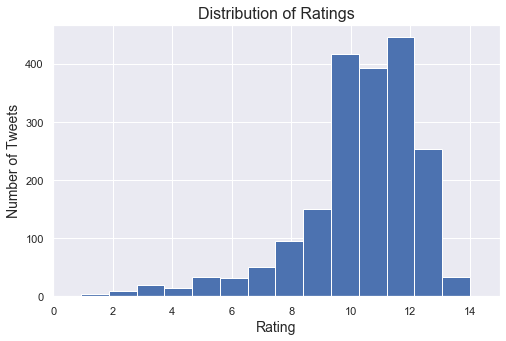

In [182]:
we_rate_dogs['rating'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

The distribution of ratings is very skewed to the left. From the descriptive statistics above we see that 75% of all ratings are between 10 and 14 inclusive (the IQR is from 10 to 12).

In [183]:
# Percentage of tweets with rating of 10 and up
rating_10up_total = sum(we_rate_dogs.rating >= 10)
rating_10up_perc = round(rating_10up_total * 100 / we_rate_dogs.shape[0])
print("Number of tweets with rating 10+:  {}".format(rating_10up_total))
print("Percentage of tweets:                {}%".format(round(rating_10up_perc, 3)))

Number of tweets with rating 10+:  1542
Percentage of tweets:                79%


In [184]:
# How many tweets have favorite count <= retweet count?
sum(we_rate_dogs.favorite_count <= we_rate_dogs.retweet_count)

0

**What is the most favourited tweet to date? Top 5?**

In [185]:
we_rate_dogs.sort_values(by = 'favorite_count', ascending = False).head(5)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stage,source,text
762,744234799360020481,2016-06-18 18:26:18+00:00,13,83795,164524,Labrador_retriever,82,None,doggo,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
306,822872901745569793,2017-01-21 18:26:02+00:00,13,47772,140616,Lakeland_terrier,19,None,puppo,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
395,807106840509214720,2016-12-09 06:17:20+00:00,13,61068,127238,Chihuahua,50,Stephan,none,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
108,866450705531457537,2017-05-22 00:28:40+00:00,13,35492,122083,French_bulldog,90,Jamesy,pupper,Twitter for iPhone,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr"
797,739238157791694849,2016-06-04 23:31:25+00:00,13,62062,121530,Eskimo_dog,50,None,doggo,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC


**What is the most retweeted tweet to date? Top 5**

In [186]:
we_rate_dogs.sort_values(by = 'retweet_count', ascending = False).head(5)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stage,source,text
762,744234799360020481,2016-06-18 18:26:18+00:00,13,83795,164524,Labrador_retriever,82,None,doggo,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
797,739238157791694849,2016-06-04 23:31:25+00:00,13,62062,121530,Eskimo_dog,50,None,doggo,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC
395,807106840509214720,2016-12-09 06:17:20+00:00,13,61068,127238,Chihuahua,50,Stephan,none,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
306,822872901745569793,2017-01-21 18:26:02+00:00,13,47772,140616,Lakeland_terrier,19,None,puppo,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
58,879415818425184262,2017-06-26 19:07:24+00:00,13,43498,104162,English_springer,38,Duddles,none,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY


There are 4 tweets that are in the top 5 for both variables, but the most popular tweet is also the same as the most retweeted tweet; it has been retweeted over 83,000 times and favourited over 164,000 times!

**What is the most common stage?**

In [187]:
we_rate_dogs.stage.value_counts()

none       1649
pupper     200 
doggo      71  
puppo      23  
floofer    8   
Name: stage, dtype: int64

In [188]:
with_stage_sum = sum(we_rate_dogs.stage != 'none')
tweets_with_stage = round(with_stage_sum * 100 / we_rate_dogs.shape[0])
print("Number of tweets WITH stage:  {}".format(with_stage_sum))
print("Percentage of tweets:          {}%".format(round(tweets_with_stage, 3)))

Number of tweets WITH stage:  302
Percentage of tweets:          15%


**What are the 10 most common breeds of dogs tweeted about? (Excluding the category 'none'.)**

In [189]:
str = "Number of tweets with 'none' predicted breed:  {} ({}%)"
none_count = sum(we_rate_dogs.breed == 'none')
none_perc = none_count * 100 / we_rate_dogs.shape[0]
print(str.format(none_count, round(none_perc)))

str = "Number of distinct breeds:  {}"
print(str.format(len(we_rate_dogs.breed.unique())))

Number of tweets with 'none' predicted breed:  302 (15%)
Number of distinct breeds:  113


In [190]:
top10_breeds_count = \
we_rate_dogs[we_rate_dogs.breed != 'none'].breed.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / we_rate_dogs.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))

Breed and number of tweets
--------------------------
golden_retriever      154
Labrador_retriever    103
Pembroke              94 
Chihuahua             90 
pug                   62 
toy_poodle            50 
chow                  47 
Samoyed               41 
Pomeranian            40 
malamute              33 
Name: breed, dtype: int64

Top 10 dog breeds make up 37% of all tweets


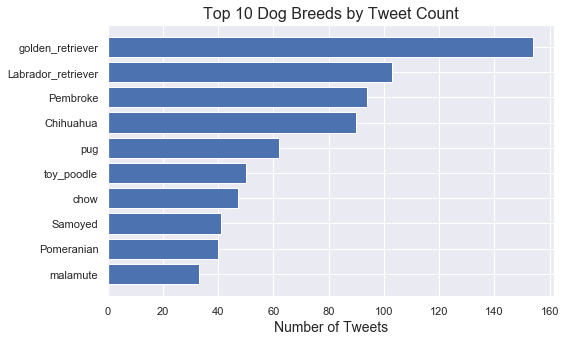

In [191]:
plt.barh(top10_breeds_count.index, top10_breeds_count)

plt.xlabel('Number of Tweets', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

The bar chart above shows that the most common dog that is tweeted about, with almost 160 tweets, is the Golden Retriever, as identified (predicted) by the neural network. Labrador Retrievers, Pembrokes and Chihuahuas are fairly close together in 2nd, 3rd, and 4th place. Further down we'll take a look at what are the most favourited dog breeds.

### Bivariate Analysis

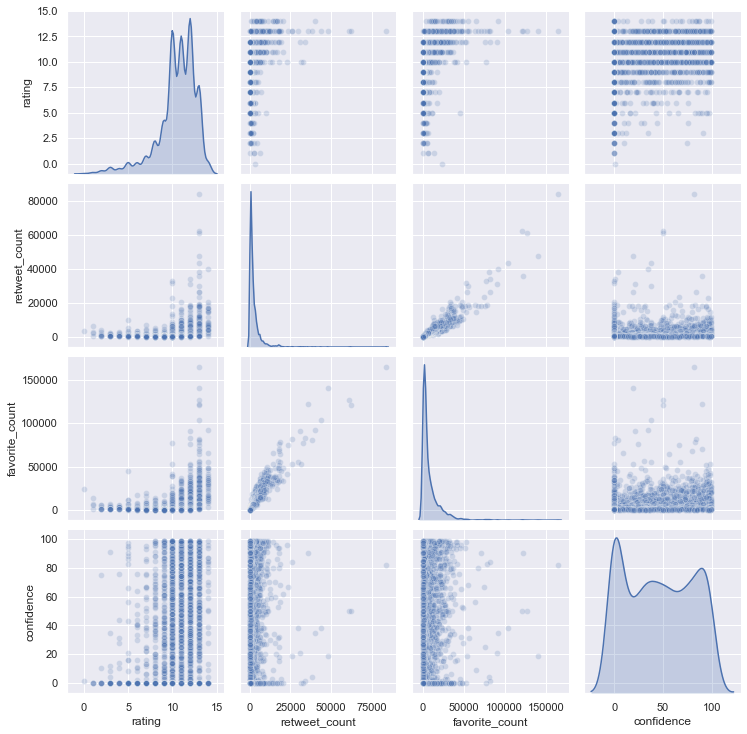

In [192]:
sns.pairplot(we_rate_dogs, 
             vars = ['rating', 'retweet_count', 'favorite_count', 'confidence'], 
             diag_kind = 'kde', plot_kws = {'alpha': 0.2});

**What dog breeds have the highest overall favourite counts?**

In [193]:
fav_counts_breed = we_rate_dogs[we_rate_dogs.breed != 'none']
fav_counts_breed = fav_counts_breed.groupby(['breed'])
fav_counts_breed = fav_counts_breed['favorite_count'].sum()
fav_counts_breed = fav_counts_breed.sort_values(ascending = False)
top10_breeds_fav_counts = fav_counts_breed.head(10)
top10_breeds_fav_counts

breed
golden_retriever      1887444
Labrador_retriever    1241894
Pembroke              1017644
Chihuahua             755370 
French_bulldog        589850 
Samoyed               543358 
chow                  436997 
cocker_spaniel        398924 
pug                   368502 
malamute              344208 
Name: favorite_count, dtype: int32

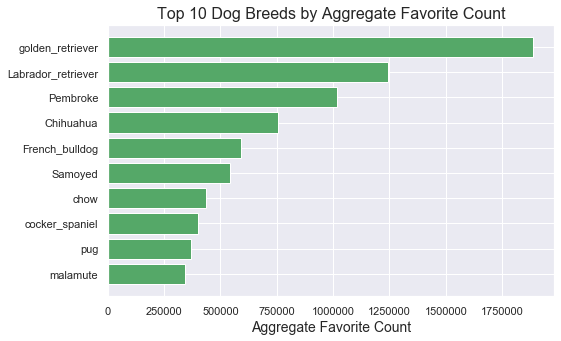

In [194]:
plt.barh(top10_breeds_fav_counts.index, top10_breeds_fav_counts, color = 'g')

plt.xlabel('Aggregate Favorite Count', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 12)
plt.title('Top 10 Dog Breeds by Aggregate Favorite Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

The plot above shows the top 10 dog breeds ranked by aggregate favourite counts. It looks very similar to the barplot ealier of top 10 dog breeds ranked by tweet, and in fact the top 4 dog breeds are the same. This also makes sense, as these dogs have the highest number of tweets.

Both groups have these 8 dog breeds in common:

In [195]:
list(set(top10_breeds_count.index) & set(top10_breeds_fav_counts.index))

['chow',
 'Chihuahua',
 'Samoyed',
 'Labrador_retriever',
 'pug',
 'malamute',
 'golden_retriever',
 'Pembroke']

**How are ratings distributed within each of the dog breeds with highest favourite counts?**

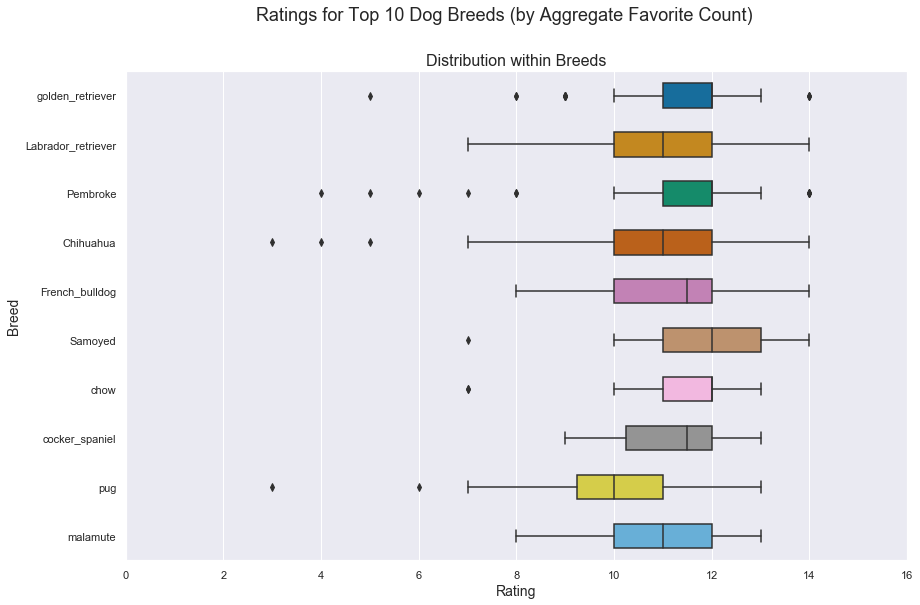

In [196]:
plt.figure(figsize = (14, 9))
bplot = sns.boxplot(y = 'breed', x = 'rating',
                    data = we_rate_dogs,
                    orient = 'h',
                    width = 0.5,
                    palette = "colorblind",
                    order = top10_breeds_fav_counts.index.tolist())
plt.xlim(0, 16)

# title and labels
plt.suptitle('Ratings for Top 10 Dog Breeds (by Aggregate Favorite Count)', fontsize = 18)
plt.title('Distribution within Breeds', fontsize = 16)
plt.ylabel("Breed",  fontsize = 14)
plt.xlabel('Rating',  fontsize = 14)
# plt.yticks(rotation = 60,  fontsize = 12)
plt.show()

The boxplot here shows the distribution of ratings within each of the top 10 dog breeds as ranked by aggregate favourite count. All the breeds range between 7 and 13, with a only a few outliers, while four of the breeds have the lower ratings at 10. Another four breeds have the highest ratings at 14.

**How are tweet ratings distributed by day?**

In [197]:
# Add random amount of float between [0.0:0.7) to input x
def jitter(x):
    random.seed()
    return x + random.uniform(0, 0.7)

In [198]:
# Return the number of days from a timedelta object x
def days_from_start(x):
    return x.days

# start date
first_day = we_rate_dogs.timestamp.min()

# array with days corresponding to timestamp
we_rate_dogs_days = (we_rate_dogs.timestamp - first_day).apply(days_from_start)

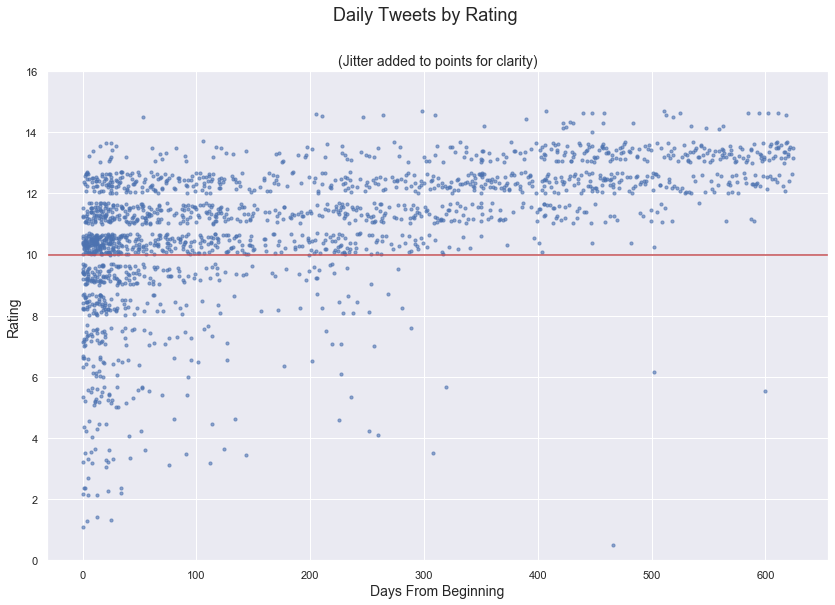

In [199]:
plt.figure(figsize = (14, 9))

# add jitter to the rating so it's not so cluttered on each line
rating_jitter = we_rate_dogs.rating.apply(jitter)

plt.scatter(we_rate_dogs_days, rating_jitter, s = 10, alpha = 0.6)

# title and labels
plt.suptitle('Daily Tweets by Rating', fontsize = 18)
plt.title('(Jitter added to points for clarity)', fontsize = 14)

plt.xlabel('Days From Beginning', fontsize = 14)
plt.ylabel('Rating', fontsize = 14)

# add the line at 10 for reference; ratings are out of 10
plt.axhline(y = 10, color = 'r')
plt.ylim(0, 16)

plt.show();

The plot here has the tweet ratings by day, showing how the ratings are generally over 10 in the latter half of the time period, after the account has been running for 300 days.

### Multivariate Analysis

**Relationship between favourite and retweet counts with dog rating as colour**

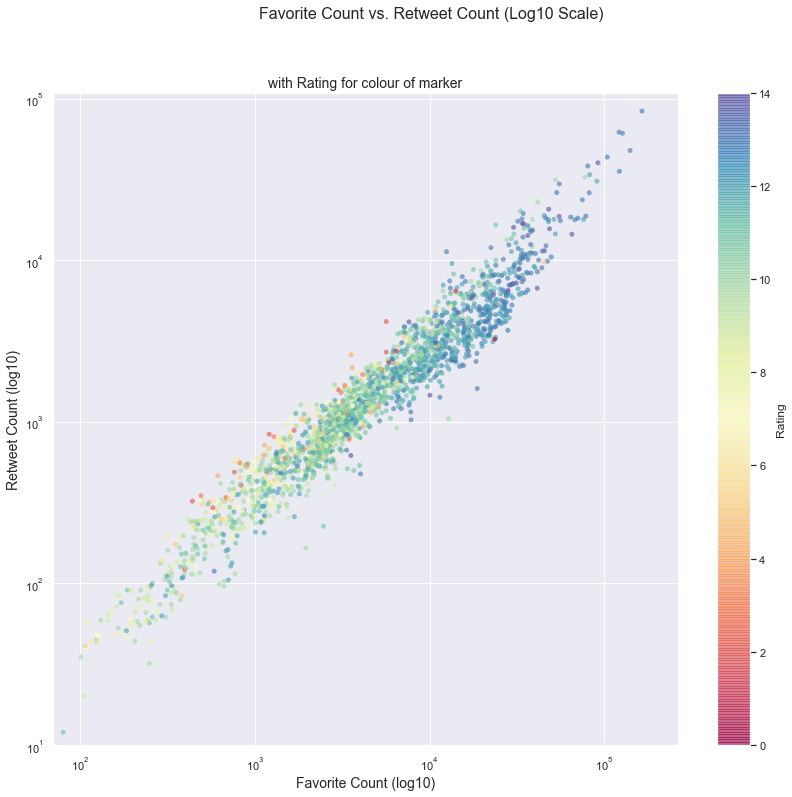

In [200]:
# Adapted from an answer from: 
# https://stackoverflow.com/questions/25741214/how-to-use-colormaps-to-color-plots-of-pandas-dataframes
# -------------------------------------------------------------------------

df = we_rate_dogs

cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 12))

plt.xscale('log')
plt.yscale('log')
plt.xlim(df['favorite_count'].min() - 10, df['favorite_count'].max() + 100000)
plt.ylim(10, df['retweet_count'].max() + 25000)
colours = df['rating']
markers = 25

plt.scatter(df['favorite_count'], df['retweet_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.6)

# title and labels
plt.suptitle('Favorite Count vs. Retweet Count (Log10 Scale)', fontsize = 16)
plt.title('with Rating for colour of marker', fontsize = 14)
plt.xlabel('Favorite Count (log10)', fontsize = 14)
plt.ylabel('Retweet Count (log10)', fontsize = 14)

# colour bar
cbar = plt.colorbar()
cbar.set_label('Rating')

plt.show();

This plot is showing a few things here, but the overall picture is the strong positive correlation between retweet counts and favorite counts. It does make sense though, personally, if I 'like' a tweet (favourite it) I am more likely to retweet it as well. The tightly packed points follow a distinct linear trend with a positive slope, so as favorite count increases so does the retweet count. Also evident, tweets with high favorite counts and high retweet counts also have higher ratings, as shown by the concentration of blue points.

**Favourite counts over time, with dog rating as colour.**

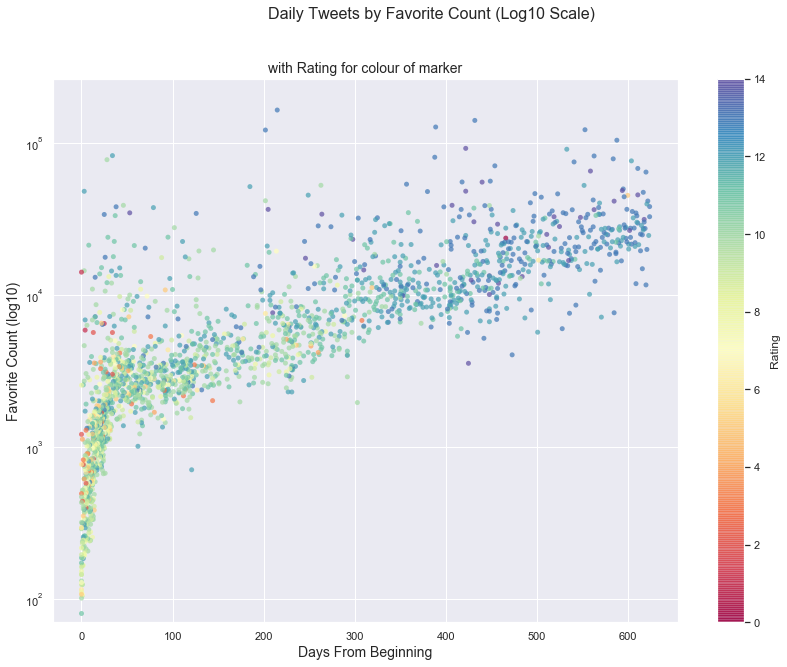

In [201]:
# Adapted from an answer from: 
# https://stackoverflow.com/questions/25741214/how-to-use-colormaps-to-color-plots-of-pandas-dataframes
# -------------------------------------------------------------------------

cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 10))

plt.yscale('log')
plt.ylim(we_rate_dogs['favorite_count'].min() - 10, 
         we_rate_dogs['favorite_count'].max() + 100000)
colours = we_rate_dogs['rating']
markers = 25

plt.scatter(we_rate_dogs_days, we_rate_dogs['favorite_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.7)

# title and labels
plt.suptitle('Daily Tweets by Favorite Count (Log10 Scale)', fontsize = 16)
plt.title('with Rating for colour of marker', fontsize = 14)
plt.xlabel('Days From Beginning', fontsize = 14)
plt.ylabel('Favorite Count (log10)', fontsize = 14)

cbar = plt.colorbar()
cbar.set_label('Rating')
plt.show();

In this plot the x-axis scale is reversed showing time in the past, and moving forward from left to right. Clearly, the more recent tweets (younger/fewer days old on the right side) are rated consistently higher (blue and green) than much older tweets (yellow and green). Also interesting is that tweets older than 1100 days have lower favourite counts; this is most likely because this was at the start of the twitter account, and so there weren't as many followers at the time.

The slope of the line is also increasing at a steady rate from around 1100 days, reflecting the daily increase in tweets being favourited. This clearly shows that the twitter account followers were active, and possibly growing, during the timeframe represented in the archive.

The older tweets also have much more variability in ratings as seen by the range of colours (more yellow and green), and also in the range of favorite_count.